# Introduction to Pandas

In this second practical session we will start with an introduction to Pandas. Pandas is a data science library that has all kinds of functionality to make working with large amounts of data easier. Especially processing tabular data (i.e. ordered tows of data e.g. age, sex, weight of a patient) is made a lot easier with Pandas. It can keep track of column names and row indexes which is much more difficult with Numpy for example. We will introduce the basic functionality of this library and in the second part of this practical, we will use Pandas to continue working on the example osteoarthritis data set from last week.

## Learning objectives
- get familiar with Pandas
- understand how dataframes work and how to interact with them
- understand how you can use Pandas to visualize data

# Getting started with Pandas
As you might have experienced last week, it can be quite hard to keep track of the labels of different columns in Numpy. You often save these in a separate array or list and link them to your data array when needed. One of the most important features of Pandas that this link between labels and data is kept during all your operations. The Series and Dataframe objects ensure this.

Let's get started by importing Numpy and Pandas.


In [3]:
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Series
A Pandas Series is a one-dimensional labeled array that can hold any data type (integers, floats, strings, Python objects, etc.). The data entries all have an index. You can create a Series in many ways, e.g. from a Python dict, an numpy array, or a scalar. You can also give your own index, or let it automatically assign an index.

Let's create our first Series.

In [4]:
# Create a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


You can see that the values are automatically printed as a table. The first column are the indices, which are automatically assigned starting from 0. The second column is the data we entered. You can also see that the data type is float64.

Below another example, but created from a Numpy array and with our own custom index.

In [5]:
# Create a Series with index
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.143904
b   -0.024859
c    2.128501
d    0.870466
e   -0.526466
dtype: float64

## Dataframe
Where a Pandas Series can represent one column of data, a Pandas DataFrame can hold any number of columns. You can see a DataFrame thus as a collection of multiple series. It is a two dimensional object (rows x columns).

You can create a Dataframe from a Python dictionary. To print a dataframe you can use display(), that gives a nicer layout then print().

In [6]:
# Create a DataFrame
data = {"column 1": [1, 3, 5, np.nan, 6, 8], "column 2": [7, 2, 3, 1, np.nan, 3]}

df = pd.DataFrame(data)
display(df)

,column 1,column 2
0,1.0,7.0
1,3.0,2.0
2,5.0,3.0
3,NaN,1.0
4,6.0,NaN
5,8.0,3.0


The dictionary can also contain Series. 

In [7]:
# Create a DataFrame from Series
s1 = pd.Series([1, 3, 5, np.nan, 6, 8])
s2 = pd.Series([7, 2, 3, 1, np.nan, 3])

data = {"column 1": s1, "column 2": s2}

df = pd.DataFrame(data)
display(df)

,column 1,column 2
0,1.0,7.0
1,3.0,2.0
2,5.0,3.0
3,NaN,1.0
4,6.0,NaN
5,8.0,3.0


There are many other ways to create Dataframes from arrays, lists, dicts and tuples, but we won't cover those all here. You can read the Pandas documentation for more background.

Dataframes have several useful attributes like 'index', 'columns' and 'dtypes'.

In [8]:
# Print different attributes
print(df.index)
print(df.columns)
print(df.dtypes)

RangeIndex(start=0, stop=6, step=1)
Index(['column 1', 'column 2'], dtype='object')
column 1    float64
column 2    float64
dtype: object


You can print the top or bottom of a dataframe seperately.

In [9]:
# Display the head and tail of the dataframe
display(df.head(3))
display(df.tail(2))

,column 1,column 2
0,1.0,7.0
1,3.0,2.0
2,5.0,3.0


,column 1,column 2
4,6.0,NaN
5,8.0,3.0


Where a Numpy array could have only one data type per array, can dataframes have different data types per column. That can make it much easier and more efficient to work with different types of data within one data object.



In [10]:
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

display(df)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Dataframes can be converted to Numpy arrays and vice versa, but if a dataframe has several different data types this can cost a lot of computation and memory resources. The index and column labels are also lost when you convert to a numpy array.

In [11]:
# Convert to a numpy array
my_array = df.to_numpy()
print(my_array.dtype)
for i in my_array:
    print(i)

object
[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']


A quick way to get an overview of a dataframe is the describe() function. This gives per column a handy overview of summary statistics.

In [12]:
df = pd.DataFrame(np.random.randn(10,8))

df.describe()

,0,1,2,3,4,5,6,7
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.554058,0.449465,-0.433418,0.004656,-0.272132,-0.198503,0.040934,-0.325410
std,0.986311,1.296266,0.739358,0.538685,1.253723,1.081334,0.771734,1.097211
min,-1.827683,-2.644029,-1.664926,-0.670444,-1.523997,-1.424116,-0.979406,-2.118800
25%,-1.190221,0.465932,-0.891208,-0.342361,-1.313866,-0.776615,-0.490138,-1.126037
50%,-0.697137,0.560249,-0.418481,-0.051841,-0.555073,-0.615338,-0.011383,-0.058861
75%,-0.193403,0.724708,-0.090374,0.355687,0.734062,-0.031310,0.502336,0.418718
max,1.716834,2.625325,0.758835,1.037899,1.910177,1.729481,1.352875,1.380114


## Selection
### Selecting a column
You can select a column by it's name.

In [13]:
# Select a column of the dataframe
df = pd.DataFrame(np.random.randn(6, 4), index=["a", "b", "c", "d", "e", "f"], columns=list("ABCD"))
display(df)

df["B"]

,A,B,C,D
a,-1.539518,0.353593,-1.832202,0.703075
b,-1.151241,0.976899,0.403481,1.903138
c,0.546954,-0.117122,0.283613,1.460580
d,1.060865,0.525867,-0.575474,-1.661441
e,-0.971959,2.013683,0.467274,0.209357
f,0.475835,0.719621,0.366169,-0.773518


a    0.353593
b    0.976899
c   -0.117122
d    0.525867
e    2.013683
f    0.719621
Name: B, dtype: float64

### Selecting rows
Or rows via indices.

In [14]:
# Select rows of the dataframe
df[0:2]

,A,B,C,D
a,-1.539518,0.353593,-1.832202,0.703075
b,-1.151241,0.976899,0.403481,1.903138


### Selecting by label
If your dataframe has a custom index, you can also use this to get a cross section of your array if .

In [15]:
# Select cross section with custom index label
df.loc["c"]

A    0.546954
B   -0.117122
C    0.283613
D    1.460580
Name: c, dtype: float64

### Selecting by position
You can also have indexing similar to Numpy slicing with .iloc().

In [16]:
# Slice similar to Numpy
df.iloc[2:4,1:3]

,B,C
c,-0.117122,0.283613
d,0.525867,-0.575474


In [17]:
# Slice similar to Numpy
df.iloc[2:4,:]

,A,B,C,D
c,0.546954,-0.117122,0.283613,1.460580
d,1.060865,0.525867,-0.575474,-1.661441


### Boolean indexing
Like Numpy you can also use Boolean indexing.

In [18]:
# Select the rows where A > 0
df[df["A"]>0]

,A,B,C,D
c,0.546954,-0.117122,0.283613,1.460580
d,1.060865,0.525867,-0.575474,-1.661441
f,0.475835,0.719621,0.366169,-0.773518


You can also select the values where a boolean condition is met. The other values are then set to NaN.

In [19]:
# Select values based on boolean condition
df[df>0]

,A,B,C,D
a,NaN,0.353593,NaN,0.703075
b,NaN,0.976899,0.403481,1.903138
c,0.546954,NaN,0.283613,1.460580
d,1.060865,0.525867,NaN,NaN
e,NaN,2.013683,0.467274,0.209357
f,0.475835,0.719621,0.366169,NaN


### ISIN
The .isin() method of a dataframe is very useful to find certain values in your dataframe.

In [20]:
df1 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["one", "two", "one", "three"]),
        "F": "foo",
    }
)
display(df1)
df1.isin(["two","three"])

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,one,foo
1,1.0,2013-01-02,1.0,3,two,foo
2,1.0,2013-01-02,1.0,3,one,foo
3,1.0,2013-01-02,1.0,3,three,foo


,A,B,C,D,E,F
0,False,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False


##Setting
With all the selection methods above you can also set the values.

In [21]:
df[df>0] = 10
display(df)

,A,B,C,D
a,-1.539518,10.000000,-1.832202,10.000000
b,-1.151241,10.000000,10.000000,10.000000
c,10.000000,-0.117122,10.000000,10.000000
d,10.000000,10.000000,-0.575474,-1.661441
e,-0.971959,10.000000,10.000000,10.000000
f,10.000000,10.000000,10.000000,-0.773518


In [22]:
df.iloc[1:3,2:4] = 0
display(df)

,A,B,C,D
a,-1.539518,10.000000,-1.832202,10.000000
b,-1.151241,10.000000,0.000000,0.000000
c,10.000000,-0.117122,0.000000,0.000000
d,10.000000,10.000000,-0.575474,-1.661441
e,-0.971959,10.000000,10.000000,10.000000
f,10.000000,10.000000,10.000000,-0.773518


##Missing data
Many data sets will have missing values in them. These can emerge in many ways, e.g. questionaires that are not filled out completely, measurements that are not taken for every patient, due to anonymization steps etc.

Pandas uses the np.nan value to represent missing data and makes sure that these missing values are not included in computations by default. Many AI models have difficulty dealing with missing data however, so we often have to solve these somehow. Either by dropping patients with missing values entirely or by filling in missing data in various ways.

Finding missing values is easy in Pandas.

In [23]:
# Find missing values
df = pd.DataFrame(np.random.randn(6, 4), index=["a", "b", "c", "d", "e", "f"], columns=list("ABCD"))
df[df>1] = np.nan
display(df)
pd.isnull(df)

,A,B,C,D
a,0.266361,0.681033,-1.222622,-1.486466
b,0.564986,-0.422692,-0.189147,-1.335630
c,-0.313410,0.208425,0.297531,-0.510330
d,-1.383087,-0.309501,0.293286,-0.003924
e,0.094143,-2.273492,0.263853,-0.335013
f,0.766689,0.415833,-0.683424,-0.577761


,A,B,C,D
a,False,False,False,False
b,False,False,False,False
c,False,False,False,False
d,False,False,False,False
e,False,False,False,False
f,False,False,False,False


You can easily drop rows that contain missing values.

In [24]:
df.dropna(how="any")

,A,B,C,D
a,0.266361,0.681033,-1.222622,-1.486466
b,0.564986,-0.422692,-0.189147,-1.335630
c,-0.313410,0.208425,0.297531,-0.510330
d,-1.383087,-0.309501,0.293286,-0.003924
e,0.094143,-2.273492,0.263853,-0.335013
f,0.766689,0.415833,-0.683424,-0.577761


You can also fill the missing values in with another value.

In [25]:
df.fillna(5)

,A,B,C,D
a,0.266361,0.681033,-1.222622,-1.486466
b,0.564986,-0.422692,-0.189147,-1.335630
c,-0.313410,0.208425,0.297531,-0.510330
d,-1.383087,-0.309501,0.293286,-0.003924
e,0.094143,-2.273492,0.263853,-0.335013
f,0.766689,0.415833,-0.683424,-0.577761


Another way of filling missing values is by interpolation. This way the values are filled by linearly interpolating between the surrounding values that are not missing.

In [26]:
df.interpolate()

,A,B,C,D
a,0.266361,0.681033,-1.222622,-1.486466
b,0.564986,-0.422692,-0.189147,-1.335630
c,-0.313410,0.208425,0.297531,-0.510330
d,-1.383087,-0.309501,0.293286,-0.003924
e,0.094143,-2.273492,0.263853,-0.335013
f,0.766689,0.415833,-0.683424,-0.577761


# Operations
You can perform many operations on dataframes. Missing values are by default excluded from these operations.


You can for example calculate a mean for your columns.

In [27]:
df.mean()

A   -0.000720
B   -0.283399
C   -0.206754
D   -0.708187
dtype: float64

Or for your rows

In [28]:
df.mean(1)

a   -0.440424
b   -0.345621
c   -0.079446
d   -0.350807
e   -0.562627
f   -0.019666
dtype: float64

Other useful operations are sum(), min(), max() and sub().

In [29]:
df.sum()

A   -0.004319
B   -1.700393
C   -1.240524
D   -4.249124
dtype: float64

In [30]:
df.min()

A   -1.383087
B   -2.273492
C   -1.222622
D   -1.486466
dtype: float64

In [31]:
df.max()

A    0.766689
B    0.681033
C    0.297531
D   -0.003924
dtype: float64

In [32]:
df.sub(df)

,A,B,C,D
a,0.0,0.0,0.0,0.0
b,0.0,0.0,0.0,0.0
c,0.0,0.0,0.0,0.0
d,0.0,0.0,0.0,0.0
e,0.0,0.0,0.0,0.0
f,0.0,0.0,0.0,0.0


You can also apply Numpy functions to dataframes. But this is generally slower, so it's better to use build-in Panda functions if these are available.

In [33]:
np.exp(df)

,A,B,C,D
a,1.305206,1.975919,0.294457,0.226170
b,1.759423,0.655280,0.827665,0.262993
c,0.730950,1.231737,1.346530,0.600298
d,0.250803,0.733813,1.340826,0.996084
e,1.098717,0.102952,1.301937,0.715329
f,2.152626,1.515633,0.504885,0.561153


## Histogram
Histograms are very useful to quickly get an overview of a large data set of integer values. In Pandas you can use the value_counts() function.

In [34]:
s_int = pd.Series(np.random.randint(0,7,size = 10))
display(s_int)
s_int.value_counts()

0    3
1    2
2    3
3    5
4    4
5    1
6    5
7    6
8    6
9    5
dtype: int64

5    3
3    2
6    2
2    1
4    1
1    1
Name: count, dtype: int64

The most frequent value can be obtained with mode().

In [35]:
s_int.mode()

0    5
dtype: int64

# Merging
Combining dataframes or series is also something we often want to do.

The concat() function let's you combine series or dataframes.

In [36]:
# Create two dataframes
df1 = pd.DataFrame(np.random.randn(10, 3))
df2 = pd.DataFrame(np.random.randn(10, 2))

# Concatenate them by rows. Can you also concatenate them by columns?
df3 = pd.concat([df1,df2],axis=0)
display(df3)

,0,1,2
0,-0.940080,-0.260819,-1.646236
1,1.615663,0.845576,0.947291
2,-1.791484,0.531461,-2.542361
3,0.818366,1.014398,0.063184
4,0.501383,-0.650325,1.227878
5,-0.511181,-1.288196,0.292728
6,-1.960476,-0.429012,0.818081
7,0.481557,-0.954054,-0.201536
8,0.297880,-0.304986,2.000028
9,1.319882,-0.443438,1.119372


# Sorting
You can sort a dataframe by the values in a certain column or row.

In [37]:
df_int = pd.DataFrame(np.random.randint(0,7,(10,8)))
display(df_int)
df_int.sort_values(0)

,0,1,2,3,4,5,6,7
0,3,6,5,3,3,3,0,2
1,4,6,1,4,6,3,4,0
2,2,2,6,2,0,1,2,1
3,0,4,4,0,4,1,0,4
4,1,0,1,1,1,0,2,2
5,3,3,4,0,5,0,6,1
6,6,1,6,3,3,4,4,1
7,4,2,3,3,6,4,6,6
8,0,1,5,4,5,1,5,5
9,2,1,6,1,0,3,5,5


,0,1,2,3,4,5,6,7
3,0,4,4,0,4,1,0,4
8,0,1,5,4,5,1,5,5
4,1,0,1,1,1,0,2,2
2,2,2,6,2,0,1,2,1
9,2,1,6,1,0,3,5,5
0,3,6,5,3,3,3,0,2
5,3,3,4,0,5,0,6,1
1,4,6,1,4,6,3,4,0
7,4,2,3,3,6,4,6,6
6,6,1,6,3,3,4,4,1


# Transpose

Sometimes transposing your rows and columns can be useful.

In [38]:
display(df)
display(df.transpose())


,A,B,C,D
a,0.266361,0.681033,-1.222622,-1.486466
b,0.564986,-0.422692,-0.189147,-1.335630
c,-0.313410,0.208425,0.297531,-0.510330
d,-1.383087,-0.309501,0.293286,-0.003924
e,0.094143,-2.273492,0.263853,-0.335013
f,0.766689,0.415833,-0.683424,-0.577761


,a,b,c,d,e,f
A,0.266361,0.564986,-0.313410,-1.383087,0.094143,0.766689
B,0.681033,-0.422692,0.208425,-0.309501,-2.273492,0.415833
C,-1.222622,-0.189147,0.297531,0.293286,0.263853,-0.683424
D,-1.486466,-1.335630,-0.510330,-0.003924,-0.335013,-0.577761


# Plotting
The Pandas library has some great build in plotting functionality based on Matplotlib that allows you to quickly create good looking plots from your data.

In [39]:
import matplotlib.pyplot as plt

Let's create a plot from a time series.

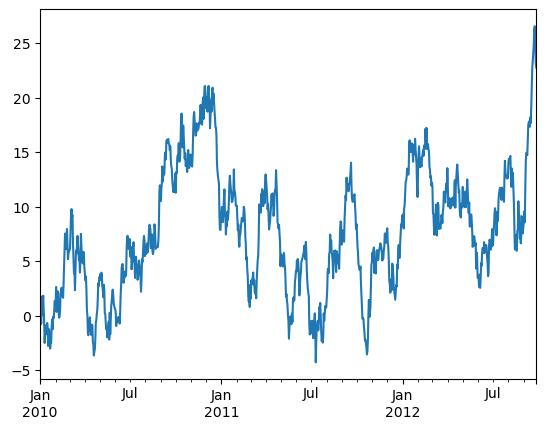

In [40]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2010", periods=1000))

ts = ts.cumsum()

ts.plot();

You can easily plot multiple columns and the column lables will be used for the legend.

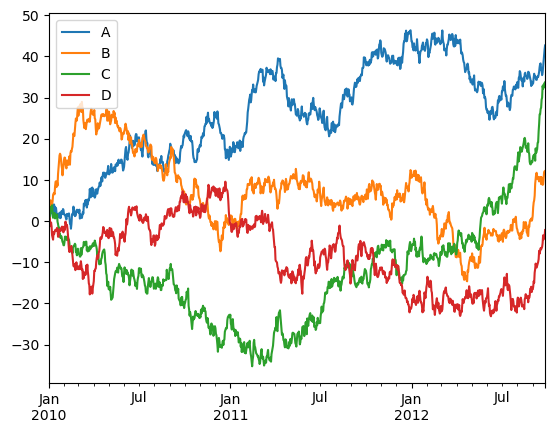

In [41]:
df = pd.DataFrame(np.random.randn(1000,4 ), index=pd.date_range("1/1/2010", periods=1000), columns=list("ABCD"))

df = df.cumsum()

df.plot();

You can use columns for the x and y axis as well.

<Axes: xlabel='A'>

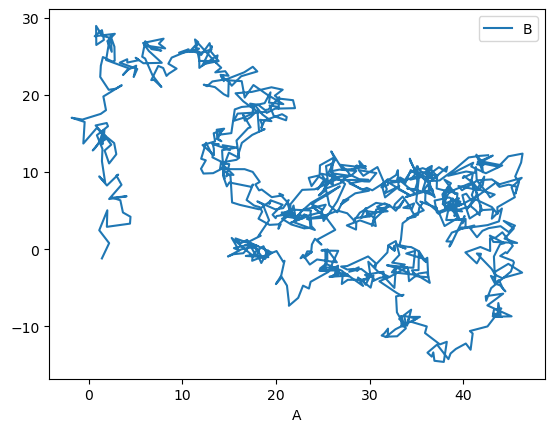

In [42]:
df.plot(x="A", y="B")

There are many types of plots you can make. A couple of the most common ones below.

Bar plots are a great way of visualizing data.

<Axes: >

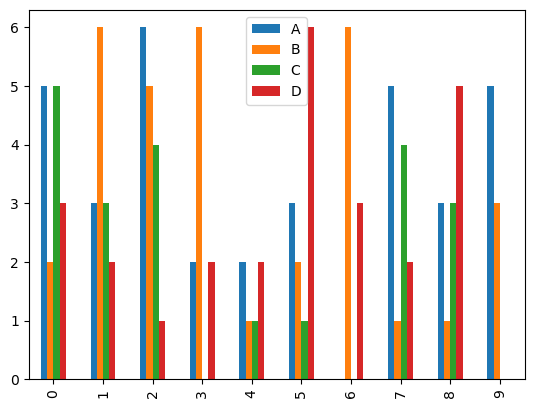

In [43]:
df = pd.DataFrame(np.random.randint(0,7,(10, 4)), columns=list("ABCD"))
df.plot.bar()

Horizontal and stacked bars are also possible.

<Axes: >

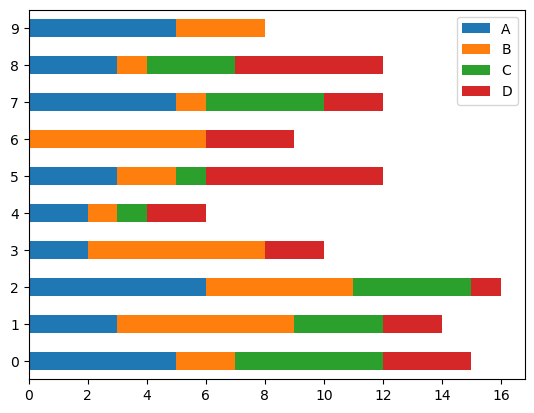

In [44]:
df.plot.barh(stacked=True)

Histograms are great to visualize distributions.


<Axes: ylabel='Frequency'>

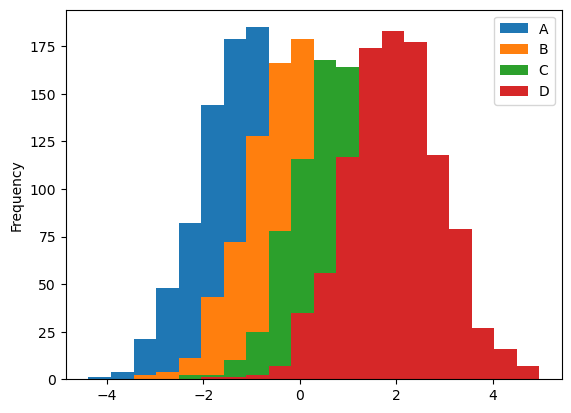

In [45]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=list("ABCD"))
df = df.add([-1,0,1,2])
df.plot.hist(bins=20)

Boxplots are a great way to visualize summary statistics of data.

<Axes: >

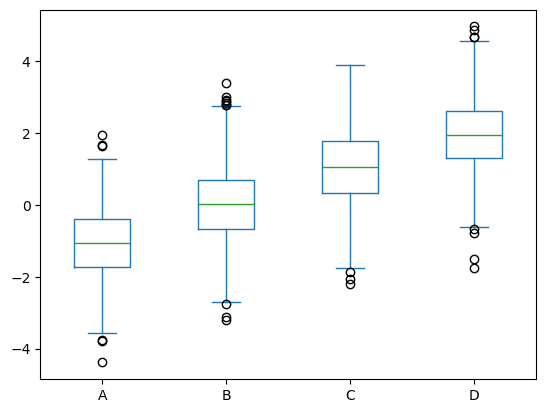

In [46]:
df.plot.box()

# Reading and writing data
Finally, you will often load and save data with Pandas. The .csv format is often used since it is great for storing tabular data.

In [47]:
# Save a dataframe to csv
df.to_csv("foo.csv")

In [48]:
# Read a dataframe from a csv
df_new = pd.read_csv("foo.csv")
display(df_new)

,Unnamed: 0,A,B,C,D
0,0,-0.534659,1.892976,0.377165,1.865924
1,1,0.201926,-0.123842,2.984272,0.627330
2,2,-1.195805,-1.151930,0.139609,2.582163
3,3,-0.900160,0.671116,-0.189587,2.496176
4,4,-0.218445,-1.550909,1.223504,0.642530
...,...,...,...,...,...
995,995,0.502214,1.108457,0.479005,3.196507
996,996,-1.903345,-1.074705,2.245141,2.596171
997,997,-2.195369,-0.997575,-0.511392,-0.210385
998,998,-0.775240,-0.110589,-0.262249,0.493750


# Exercise
Below the same data about average monthly temperatures for cities as last week, but now in a Pandas dataframe. Let's try to redo our exercise from last week, but now with Pandas functions. The questions are slightly different.
- What month is coldest on average?
- What is the city with the lowest average temperature?
- What city has the smallest difference between the coldest and warmest month?
- What city has the most months with an average monthly temperature above 15 degrees.
- Can you create a plot for every city with months on the x-axis and temperature on the y-axis? (Can all be plotted in the same figure).

In [49]:
# Create a dataframe with temperatures
temperatures = pd.DataFrame(np.array([[1,3,8,14,17,20,22,23,23,20,15,8],
                         [2,5,9,15,19,23,26,26,23,20,14,7],
                         [-1,-2,5,10,12,15,20,20,17,13,8,2],
                         [-5,-3,3,11,17,24,25,23,20,15,8,-2],
                         [8,12,15,17,19,20,22,21,20,15,12,8],
                         [5,12,21,25,28,28,30,29,25,17,12,5],
                         [-10,-5,-3,5,10,12,15,12,10,3,-4,-9],
                         [16,17,17,19,23,27,27,27,20,19,18,16],
                         [1,5,10,17,20,25,27,28,24,20,15,8],
                         [2,5,8,12,14,15,17,19,18,15,9,4]]), index = ['New York', 'Washington', 'Ottawa', 'Moscow', 'Bordeaux', 'Rome', 'Juneau', 'Bangkok', 'Milan', 'Dublin'], 
                         columns = ['January','February','March','April','May','June','July','August','September','October','November','December'])

display(temperatures)

,January,February,March,April,May,June,July,August,September,October,November,December
New York,1,3,8,14,17,20,22,23,23,20,15,8
Washington,2,5,9,15,19,23,26,26,23,20,14,7
Ottawa,-1,-2,5,10,12,15,20,20,17,13,8,2
Moscow,-5,-3,3,11,17,24,25,23,20,15,8,-2
Bordeaux,8,12,15,17,19,20,22,21,20,15,12,8
Rome,5,12,21,25,28,28,30,29,25,17,12,5
Juneau,-10,-5,-3,5,10,12,15,12,10,3,-4,-9
Bangkok,16,17,17,19,23,27,27,27,20,19,18,16
Milan,1,5,10,17,20,25,27,28,24,20,15,8
Dublin,2,5,8,12,14,15,17,19,18,15,9,4


# functions to solve the questions above:
What month is coldest on average?
- What is the city with the lowest average temperature?
- What city has the smallest difference between the coldest and warmest month?
- What city has the most months with an average monthly temperature above 15 degrees.
- Can you create a plot for every city with months on the x-axis and temperature on the y-axis? (Can all be plotted in the same figure).

Bangkok
Moscow
Bangkok
Bangkok


<Axes: >

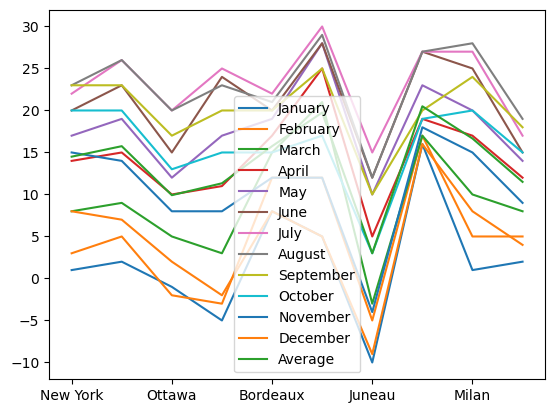

In [74]:
#print(temperatures.index, temperatures.columns)

# add average temperature column
temperatures['Average'] = temperatures.mean(axis=1)

# find the city with the highest average temperature
print(temperatures['Average'].idxmax())

# find the city with the biggest temperature range
new_df = temperatures.max(axis=1) - temperatures.min(axis=1)
print(new_df.idxmax())

# find the city with the smallest temperature range
min_df = temperatures.max(axis=1) - temperatures.min(axis=1)
print(min_df.idxmin())

# find the city with most month has temperature above 15 degree
count_df = temperatures[temperatures > 15].count(axis=1)
print(count_df.idxmax())

# can you create a plot for every city with months on the x-axis and temperature on the y-axis?
temperatures.plot()


#print(temperatures)
#for i, j in temperatures.iterrows():
#    #print(j)
#    nparray = np.array(j)